## KAN (Kolmogorov Arnold Network) method

1. Problem: Classification of Heart Disease using KAN appoach

2. Research paper on KAN: Kolmogorov-Arnold Networks: https://arxiv.org/pdf/2404.19756

3. You can access dataset from Kaggle: https://www.kaggle.com/competitions/heart-disease-uci/data

4. Access 'imodelsx' scikit-learn library to explain, predict, and steer text models/data from here: https://pypi.org/project/imodelsx/

5. Access Module imodelsx.kan.kan_sklearn from here: https://csinva.io/imodelsX/kan/kan_sklearn.html


In [2]:
#installing imodelsx for implemeting KAN (Kolmogorov-Arnold Networks)
#For more information, please refer this: https://pypi.org/project/imodelsx/
!pip install imodelsx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.0/114.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.2/237.2 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━

In [3]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imodelsx import KANClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [4]:
#reading heart disease classification dataset. Please refer this documentation: /content/data/documentation.pdf
df = '/content/data/heart_statlog_cleveland_hungary_final.csv'
df = pd.read_csv(df)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [5]:
#extracting input and output data from the training dataset
#excluding all column, except a last one
X = df.iloc[:, :-1]
#excluding only the last column
y = df.iloc[:, -1]
#fitting the scaler on the features
scaler = StandardScaler().fit(X)
#scaling the features
X_scaled = scaler.transform(X)
X_scaled

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-1.46672783,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [-0.50460037, -1.79857595, -0.24893198, ..., -0.79521891,
         0.07111913,  0.61558278],
       [-1.78743698,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       ...,
       [ 0.35062404,  0.55599543,  0.82048698, ...,  1.25751537,
         0.25530143,  0.61558278],
       [ 0.35062404, -1.79857595, -1.31835093, ..., -0.79521891,
        -0.84979236,  0.61558278],
       [-1.68053393,  0.55599543, -0.24893198, ..., -0.79521891,
        -0.84979236, -1.02321701]])

In [6]:
#splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=12, stratify=y)
X_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-1.35982478,  0.55599543,  0.82048698, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [-1.35982478,  0.55599543,  0.82048698, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [ 0.67133319,  0.55599543,  0.82048698, ...,  1.25751537,
         0.16321028,  2.25438257],
       ...,
       [-1.35982478, -1.79857595, -0.24893198, ...,  1.25751537,
        -0.84979236, -1.02321701],
       [-1.68053393, -1.79857595,  0.82048698, ..., -0.79521891,
         1.72875982, -1.02321701],
       [ 1.0989454 ,  0.55599543,  0.82048698, ...,  1.25751537,
         0.53157488,  0.61558278]])

In [7]:
#checking shape of the train and test datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(833, 11)
(833,)
(357, 11)
(357,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
#initializing a KANClassifier using GPU acceleration (CUDA device).
#KANClassifier() has default value of each parameter.
#There are parameters with their default values:
# regularize_activation=1.0
# regularize_entropy=1.0
# regularize_ridge=0.0
# grid_size=5,
# spline_order=3,
# scale_noise=0.1,
# scale_base=1.0,
# scale_spline=1.0,
# base_activation=torch.nn.SiLU,
# grid_eps=0.02,
# grid_range=[-1, 1],
model = KANClassifier(device='cuda')

#training the model on training dataset (X_train, y_train)
model=model.fit(X_train, y_train)
#predicting output for the X_test dataset
y_pred = model.predict(X_test)

#accuracy on test dataset
accuracy_test = accuracy_score(y_test, y_pred)
print("\nAccuracy on Test Set:", accuracy_test)
#classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred))
#Cohen's Kappa score for the test set
kappa_test = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score on Test Set:", kappa_test)
#confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:01<00:00, 59.18it/s]


Accuracy on Test Set: 0.6918767507002801
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       168
           1       0.67      0.81      0.74       189

    accuracy                           0.69       357
   macro avg       0.70      0.68      0.68       357
weighted avg       0.70      0.69      0.69       357

Cohen's Kappa Score on Test Set: 0.37374413931681183
Confusion Matrix for Test Set:
[[ 94  74]
 [ 36 153]]


###**Interpretation of basic model**

1. The model achieved an accuracy of 61.18% on the test set, shows good predictive ability.

2. The Cohen's Kappa score of 0.37 show moderate agreement between predicted and actual data points, indicating scope for improvement.

3. Analysis of the confusion matrix (94 true positives, 153 true negatives, 74 false positives (FP), 36 false negatives(FN))

4. There is need of improvement in model performance as there are 74 FP and 36 FN.

Performace Metrics:

* Cohen's Kappa: it measures the agreement between predicted and actual classifications, adjusted for chance.
* Classification Report: it provides detailed performance metrics such as precision, recall, and F1-score for each class.
* Confusion Matrix: it shows the true positives, false positives, true negatives, and false negatives, providing insights into the classification performance.

In [10]:
#defining hyperparameter ranges
#adjusting hidden layer sizes
hidden_layers = [32, 64]
#different activation regularization values
activations = [0.1, 0.3]
#different entropy regularization values
entropies = [0.1, 0.3]
#different ridge regularization values
ridges = [0.1, 0.3]
#iterating through combinations of hyperparameters including the new dropout rate
for hidden_layer_size in hidden_layers:
    for regularize_activation in activations:
        for regularize_entropy in entropies:
            for regularize_ridge in ridges:
                    kan_model = KANClassifier(hidden_layer_size=hidden_layer_size, device='cuda',
                                          regularize_activation=regularize_activation,
                                          regularize_entropy=regularize_entropy,
                                          regularize_ridge=regularize_ridge)

                    #training the model
                    kan_model.fit(X_train, y_train)
                    #predicting data points using 'kan_model'
                    y_pred = kan_model.predict(X_test)
                    #printing hyperparameter values
                    print(hidden_layer_size, regularize_activation, regularize_entropy, regularize_ridge)
                    #accuracy on test dataset
                    accuracy_test = accuracy_score(y_test, y_pred)
                    print("Accuracy on Test Set:", accuracy_test)

                    #Cohen's Kappa score for the test set
                    kappa_test = cohen_kappa_score(y_test, y_pred)
                    print("Cohen's Kappa Score on Test Set:", kappa_test)

                    #classification report for the test set
                    #print("Classification Report for Test Set:")
                    print(classification_report(y_test, y_pred))

                    #confusion matrix for the test set
                    conf_matrix_test = confusion_matrix(y_test, y_pred)
                    print("Confusion Matrix for Test Set:\n", conf_matrix_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:06<00:00, 15.68it/s]


32 0.1 0.1 0.1
Accuracy on Test Set: 0.5910364145658263
Cohen's Kappa Score on Test Set: 0.1643097643097644
              precision    recall  f1-score   support

           0       0.60      0.40      0.48       168
           1       0.59      0.76      0.66       189

    accuracy                           0.59       357
   macro avg       0.59      0.58      0.57       357
weighted avg       0.59      0.59      0.58       357

Confusion Matrix for Test Set:
 [[ 68 100]
 [ 46 143]]


100%|██████████| 100/100 [00:03<00:00, 32.23it/s]


32 0.1 0.1 0.3
Accuracy on Test Set: 0.6414565826330533
Cohen's Kappa Score on Test Set: 0.27126590756865376
              precision    recall  f1-score   support

           0       0.65      0.51      0.57       168
           1       0.63      0.76      0.69       189

    accuracy                           0.64       357
   macro avg       0.64      0.63      0.63       357
weighted avg       0.64      0.64      0.63       357

Confusion Matrix for Test Set:
 [[ 85  83]
 [ 45 144]]


100%|██████████| 100/100 [00:02<00:00, 33.50it/s]


32 0.1 0.3 0.1
Accuracy on Test Set: 0.6078431372549019
Cohen's Kappa Score on Test Set: 0.21761998685075612
              precision    recall  f1-score   support

           0       0.58      0.64      0.60       168
           1       0.64      0.58      0.61       189

    accuracy                           0.61       357
   macro avg       0.61      0.61      0.61       357
weighted avg       0.61      0.61      0.61       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 79 110]]


100%|██████████| 100/100 [00:02<00:00, 46.73it/s]


32 0.1 0.3 0.3
Accuracy on Test Set: 0.5714285714285714
Cohen's Kappa Score on Test Set: 0.15524520948359866
              precision    recall  f1-score   support

           0       0.53      0.71      0.61       168
           1       0.63      0.45      0.53       189

    accuracy                           0.57       357
   macro avg       0.58      0.58      0.57       357
weighted avg       0.59      0.57      0.57       357

Confusion Matrix for Test Set:
 [[119  49]
 [104  85]]


100%|██████████| 100/100 [00:02<00:00, 36.10it/s]


32 0.3 0.1 0.1
Accuracy on Test Set: 0.5434173669467787
Cohen's Kappa Score on Test Set: 0.09944751381215466
              precision    recall  f1-score   support

           0       0.51      0.67      0.58       168
           1       0.60      0.43      0.50       189

    accuracy                           0.54       357
   macro avg       0.55      0.55      0.54       357
weighted avg       0.56      0.54      0.54       357

Confusion Matrix for Test Set:
 [[113  55]
 [108  81]]


100%|██████████| 100/100 [00:01<00:00, 56.60it/s]


32 0.3 0.1 0.3
Accuracy on Test Set: 0.6526610644257703
Cohen's Kappa Score on Test Set: 0.30566534914361
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       168
           1       0.68      0.64      0.66       189

    accuracy                           0.65       357
   macro avg       0.65      0.65      0.65       357
weighted avg       0.65      0.65      0.65       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 68 121]]


100%|██████████| 100/100 [00:02<00:00, 33.52it/s]


32 0.3 0.3 0.1
Accuracy on Test Set: 0.5042016806722689
Cohen's Kappa Score on Test Set: 0.003972194637537285
              precision    recall  f1-score   support

           0       0.47      0.46      0.47       168
           1       0.53      0.54      0.54       189

    accuracy                           0.50       357
   macro avg       0.50      0.50      0.50       357
weighted avg       0.50      0.50      0.50       357

Confusion Matrix for Test Set:
 [[ 78  90]
 [ 87 102]]


100%|██████████| 100/100 [00:03<00:00, 30.36it/s]


32 0.3 0.3 0.3
Accuracy on Test Set: 0.7338935574229691
Cohen's Kappa Score on Test Set: 0.4636333444038525
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       168
           1       0.73      0.78      0.76       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 41 148]]


100%|██████████| 100/100 [00:02<00:00, 34.06it/s]


64 0.1 0.1 0.1
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5344770702738371
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       168
           1       0.79      0.76      0.78       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 45 144]]


100%|██████████| 100/100 [00:02<00:00, 45.65it/s]


64 0.1 0.1 0.3
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5524825058313896
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       168
           1       0.76      0.85      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 28 161]]


100%|██████████| 100/100 [00:01<00:00, 58.65it/s]


64 0.1 0.3 0.1
Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.44131455399061026
              precision    recall  f1-score   support

           0       0.78      0.58      0.67       168
           1       0.70      0.85      0.77       189

    accuracy                           0.73       357
   macro avg       0.74      0.72      0.72       357
weighted avg       0.73      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 28 161]]


100%|██████████| 100/100 [00:01<00:00, 58.69it/s]


64 0.1 0.3 0.3
Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.5162370271175092
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       168
           1       0.73      0.87      0.80       189

    accuracy                           0.76       357
   macro avg       0.77      0.75      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 24 165]]


100%|██████████| 100/100 [00:01<00:00, 58.59it/s]


64 0.3 0.1 0.1
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5815036593479708
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       168
           1       0.78      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 28 161]]


100%|██████████| 100/100 [00:02<00:00, 49.94it/s]


64 0.3 0.1 0.3
Accuracy on Test Set: 0.711484593837535
Cohen's Kappa Score on Test Set: 0.41535893155258763
              precision    recall  f1-score   support

           0       0.73      0.61      0.66       168
           1       0.70      0.80      0.75       189

    accuracy                           0.71       357
   macro avg       0.72      0.71      0.71       357
weighted avg       0.71      0.71      0.71       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 37 152]]


100%|██████████| 100/100 [00:01<00:00, 57.73it/s]


64 0.3 0.3 0.1
Accuracy on Test Set: 0.6610644257703081
Cohen's Kappa Score on Test Set: 0.32134609039920814
              precision    recall  f1-score   support

           0       0.63      0.66      0.65       168
           1       0.69      0.66      0.67       189

    accuracy                           0.66       357
   macro avg       0.66      0.66      0.66       357
weighted avg       0.66      0.66      0.66       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 64 125]]


100%|██████████| 100/100 [00:02<00:00, 39.04it/s]

64 0.3 0.3 0.3
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5393258426966292
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       168
           1       0.79      0.78      0.78       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[128  40]
 [ 42 147]]


In [12]:
#defining hyperparameter ranges
#adjusting hidden layer sizes
hidden_layers = [32, 64, 128]
#different activation regularization values
activations = [0.1, 0.3, 0.5]
#different entropy regularization values
entropies = [0.1, 0.3, 0.5]
#different ridge regularization values
ridges = [0.1, 0.3, 0.5, 0.7]
#different spline_order values
splineOrder = [3, 5]
#iterating through combinations of hyperparameters including the new dropout rate
for hidden_layer_size in hidden_layers:
    for regularize_activation in activations:
        for regularize_entropy in entropies:
            for regularize_ridge in ridges:
              for spline_order in splineOrder:
                    kan_model = KANClassifier(hidden_layer_size=hidden_layer_size, device='cuda',
                                          regularize_activation=regularize_activation,
                                          regularize_entropy=regularize_entropy,
                                          regularize_ridge=regularize_ridge,
                                          spline_order=spline_order)

                    #training the model
                    kan_model.fit(X_train, y_train)
                    #predicting data points using 'kan_model'
                    y_pred = kan_model.predict(X_test)
                    #printing hyperparameter values
                    print(hidden_layer_size, regularize_activation, regularize_entropy, regularize_ridge, spline_order)
                    #accuracy on test dataset
                    accuracy_test = accuracy_score(y_test, y_pred)
                    print("Accuracy on Test Set:", accuracy_test)

                    #Cohen's Kappa score for the test set
                    kappa_test = cohen_kappa_score(y_test, y_pred)
                    print("Cohen's Kappa Score on Test Set:", kappa_test)

                    #classification report for the test set
                    #print("Classification Report for Test Set:")
                    print(classification_report(y_test, y_pred))

                    #confusion matrix for the test set
                    conf_matrix_test = confusion_matrix(y_test, y_pred)
                    print("Confusion Matrix for Test Set:\n", conf_matrix_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:01<00:00, 57.69it/s]


32 0.1 0.1 0.1 3
Accuracy on Test Set: 0.5378151260504201
Cohen's Kappa Score on Test Set: 0.09836065573770492
              precision    recall  f1-score   support

           0       0.51      0.77      0.61       168
           1       0.62      0.33      0.43       189

    accuracy                           0.54       357
   macro avg       0.56      0.55      0.52       357
weighted avg       0.57      0.54      0.52       357

Confusion Matrix for Test Set:
 [[129  39]
 [126  63]]


100%|██████████| 100/100 [00:02<00:00, 49.18it/s]


32 0.1 0.1 0.1 5
Accuracy on Test Set: 0.5966386554621849
Cohen's Kappa Score on Test Set: 0.17129316181448873
              precision    recall  f1-score   support

           0       0.62      0.36      0.46       168
           1       0.59      0.80      0.68       189

    accuracy                           0.60       357
   macro avg       0.60      0.58      0.57       357
weighted avg       0.60      0.60      0.58       357

Confusion Matrix for Test Set:
 [[ 61 107]
 [ 37 152]]


 58%|█████▊    | 58/100 [00:01<00:00, 57.91it/s]


	Early stopping
32 0.1 0.1 0.3 3
Accuracy on Test Set: 0.5854341736694678
Cohen's Kappa Score on Test Set: 0.17127799736495386
              precision    recall  f1-score   support

           0       0.56      0.60      0.57       168
           1       0.62      0.58      0.60       189

    accuracy                           0.59       357
   macro avg       0.59      0.59      0.59       357
weighted avg       0.59      0.59      0.59       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 80 109]]


100%|██████████| 100/100 [00:01<00:00, 58.38it/s]


32 0.1 0.1 0.3 5
Accuracy on Test Set: 0.6778711484593838
Cohen's Kappa Score on Test Set: 0.3454971543354537
              precision    recall  f1-score   support

           0       0.70      0.55      0.62       168
           1       0.66      0.79      0.72       189

    accuracy                           0.68       357
   macro avg       0.68      0.67      0.67       357
weighted avg       0.68      0.68      0.67       357

Confusion Matrix for Test Set:
 [[ 92  76]
 [ 39 150]]


100%|██████████| 100/100 [00:01<00:00, 58.50it/s]


32 0.1 0.1 0.5 3
Accuracy on Test Set: 0.5630252100840336
Cohen's Kappa Score on Test Set: 0.12417437252311758
              precision    recall  f1-score   support

           0       0.53      0.55      0.54       168
           1       0.59      0.58      0.58       189

    accuracy                           0.56       357
   macro avg       0.56      0.56      0.56       357
weighted avg       0.56      0.56      0.56       357

Confusion Matrix for Test Set:
 [[ 92  76]
 [ 80 109]]


100%|██████████| 100/100 [00:02<00:00, 42.55it/s]


32 0.1 0.1 0.5 5
Accuracy on Test Set: 0.6330532212885154
Cohen's Kappa Score on Test Set: 0.2554329655633567
              precision    recall  f1-score   support

           0       0.64      0.51      0.57       168
           1       0.63      0.74      0.68       189

    accuracy                           0.63       357
   macro avg       0.63      0.63      0.62       357
weighted avg       0.63      0.63      0.63       357

Confusion Matrix for Test Set:
 [[ 86  82]
 [ 49 140]]


100%|██████████| 100/100 [00:02<00:00, 45.99it/s]


32 0.1 0.1 0.7 3
Accuracy on Test Set: 0.7142857142857143
Cohen's Kappa Score on Test Set: 0.4262078093977498
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       168
           1       0.73      0.74      0.73       189

    accuracy                           0.71       357
   macro avg       0.71      0.71      0.71       357
weighted avg       0.71      0.71      0.71       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 50 139]]


100%|██████████| 100/100 [00:01<00:00, 58.07it/s]


32 0.1 0.1 0.7 5
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5258964143426295
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       168
           1       0.76      0.81      0.78       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 36 153]]


 65%|██████▌   | 65/100 [00:01<00:00, 58.01it/s]


	Early stopping
32 0.1 0.3 0.1 3
Accuracy on Test Set: 0.6330532212885154
Cohen's Kappa Score on Test Set: 0.2519314746388982
              precision    recall  f1-score   support

           0       0.65      0.47      0.55       168
           1       0.62      0.78      0.69       189

    accuracy                           0.63       357
   macro avg       0.64      0.62      0.62       357
weighted avg       0.64      0.63      0.62       357

Confusion Matrix for Test Set:
 [[ 79  89]
 [ 42 147]]


100%|██████████| 100/100 [00:01<00:00, 58.93it/s]


32 0.1 0.3 0.1 5
Accuracy on Test Set: 0.7338935574229691
Cohen's Kappa Score on Test Set: 0.45932373619015743
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       168
           1       0.71      0.85      0.77       189

    accuracy                           0.73       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.74      0.73      0.73       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 50.44it/s]


32 0.1 0.3 0.3 3
Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.48347245409015027
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       168
           1       0.72      0.84      0.78       189

    accuracy                           0.75       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.75      0.74       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 58.28it/s]


32 0.1 0.3 0.3 5
Accuracy on Test Set: 0.5518207282913166
Cohen's Kappa Score on Test Set: 0.09694555112881809
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       168
           1       0.57      0.61      0.59       189

    accuracy                           0.55       357
   macro avg       0.55      0.55      0.55       357
weighted avg       0.55      0.55      0.55       357

Confusion Matrix for Test Set:
 [[ 82  86]
 [ 74 115]]


100%|██████████| 100/100 [00:02<00:00, 45.31it/s]


32 0.1 0.3 0.5 3
Accuracy on Test Set: 0.6834733893557423
Cohen's Kappa Score on Test Set: 0.364117841774247
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       168
           1       0.70      0.71      0.70       189

    accuracy                           0.68       357
   macro avg       0.68      0.68      0.68       357
weighted avg       0.68      0.68      0.68       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 55 134]]


100%|██████████| 100/100 [00:02<00:00, 45.27it/s]


32 0.1 0.3 0.5 5
Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.5178511845178512
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       168
           1       0.74      0.85      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 54.61it/s]


32 0.1 0.3 0.7 3
Accuracy on Test Set: 0.27450980392156865
Cohen's Kappa Score on Test Set: -0.4478789871752713
              precision    recall  f1-score   support

           0       0.25      0.28      0.27       168
           1       0.30      0.27      0.28       189

    accuracy                           0.27       357
   macro avg       0.28      0.27      0.27       357
weighted avg       0.28      0.27      0.27       357

Confusion Matrix for Test Set:
 [[ 47 121]
 [138  51]]


100%|██████████| 100/100 [00:01<00:00, 57.69it/s]


32 0.1 0.3 0.7 5
Accuracy on Test Set: 0.7366946778711485
Cohen's Kappa Score on Test Set: 0.4641180415828303
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       168
           1       0.71      0.86      0.78       189

    accuracy                           0.74       357
   macro avg       0.75      0.73      0.73       357
weighted avg       0.75      0.74      0.73       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 58.43it/s]


32 0.1 0.5 0.1 3
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5271523178807948
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       168
           1       0.77      0.79      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 40 149]]


100%|██████████| 100/100 [00:01<00:00, 59.59it/s]


32 0.1 0.5 0.1 5
Accuracy on Test Set: 0.6918767507002801
Cohen's Kappa Score on Test Set: 0.3635125936010891
              precision    recall  f1-score   support

           0       0.85      0.42      0.56       168
           1       0.64      0.94      0.76       189

    accuracy                           0.69       357
   macro avg       0.75      0.68      0.66       357
weighted avg       0.74      0.69      0.67       357

Confusion Matrix for Test Set:
 [[ 70  98]
 [ 12 177]]


100%|██████████| 100/100 [00:01<00:00, 58.21it/s]


32 0.1 0.5 0.3 3
Accuracy on Test Set: 0.7142857142857143
Cohen's Kappa Score on Test Set: 0.4149797570850202
              precision    recall  f1-score   support

           0       0.81      0.52      0.63       168
           1       0.67      0.89      0.77       189

    accuracy                           0.71       357
   macro avg       0.74      0.70      0.70       357
weighted avg       0.74      0.71      0.70       357

Confusion Matrix for Test Set:
 [[ 87  81]
 [ 21 168]]


100%|██████████| 100/100 [00:02<00:00, 42.19it/s]


32 0.1 0.5 0.3 5
Accuracy on Test Set: 0.6218487394957983
Cohen's Kappa Score on Test Set: 0.25317279531402537
              precision    recall  f1-score   support

           0       0.58      0.74      0.65       168
           1       0.69      0.51      0.59       189

    accuracy                           0.62       357
   macro avg       0.63      0.63      0.62       357
weighted avg       0.64      0.62      0.62       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 92  97]]


100%|██████████| 100/100 [00:02<00:00, 44.02it/s]


32 0.1 0.5 0.5 3
Accuracy on Test Set: 0.6470588235294118
Cohen's Kappa Score on Test Set: 0.2664383561643835
              precision    recall  f1-score   support

           0       0.83      0.32      0.46       168
           1       0.61      0.94      0.74       189

    accuracy                           0.65       357
   macro avg       0.72      0.63      0.60       357
weighted avg       0.71      0.65      0.61       357

Confusion Matrix for Test Set:
 [[ 53 115]
 [ 11 178]]


 56%|█████▌    | 56/100 [00:01<00:01, 43.80it/s]


	Early stopping
32 0.1 0.5 0.5 5
Accuracy on Test Set: 0.6638655462184874
Cohen's Kappa Score on Test Set: 0.3145161290322581
              precision    recall  f1-score   support

           0       0.70      0.50      0.58       168
           1       0.65      0.81      0.72       189

    accuracy                           0.66       357
   macro avg       0.67      0.65      0.65       357
weighted avg       0.67      0.66      0.65       357

Confusion Matrix for Test Set:
 [[ 84  84]
 [ 36 153]]


100%|██████████| 100/100 [00:01<00:00, 57.68it/s]


32 0.1 0.5 0.7 3
Accuracy on Test Set: 0.5686274509803921
Cohen's Kappa Score on Test Set: 0.11554054054054053
              precision    recall  f1-score   support

           0       0.57      0.35      0.43       168
           1       0.57      0.76      0.65       189

    accuracy                           0.57       357
   macro avg       0.57      0.56      0.54       357
weighted avg       0.57      0.57      0.55       357

Confusion Matrix for Test Set:
 [[ 59 109]
 [ 45 144]]


100%|██████████| 100/100 [00:01<00:00, 58.82it/s]


32 0.1 0.5 0.7 5
Accuracy on Test Set: 0.6134453781512605
Cohen's Kappa Score on Test Set: 0.2262532981530343
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       168
           1       0.64      0.61      0.63       189

    accuracy                           0.61       357
   macro avg       0.61      0.61      0.61       357
weighted avg       0.61      0.61      0.61       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 73 116]]


 58%|█████▊    | 58/100 [00:01<00:00, 56.94it/s]


	Early stopping
32 0.3 0.1 0.1 3
Accuracy on Test Set: 0.6974789915966386
Cohen's Kappa Score on Test Set: 0.3892215568862275
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       168
           1       0.70      0.76      0.73       189

    accuracy                           0.70       357
   macro avg       0.70      0.69      0.69       357
weighted avg       0.70      0.70      0.70       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 45 144]]


100%|██████████| 100/100 [00:01<00:00, 57.96it/s]


32 0.3 0.1 0.1 5
Accuracy on Test Set: 0.7394957983193278
Cohen's Kappa Score on Test Set: 0.46605876393110435
              precision    recall  f1-score   support

           0       0.86      0.54      0.66       168
           1       0.69      0.92      0.79       189

    accuracy                           0.74       357
   macro avg       0.77      0.73      0.72       357
weighted avg       0.77      0.74      0.73       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 15 174]]


100%|██████████| 100/100 [00:01<00:00, 58.39it/s]


32 0.3 0.1 0.3 3
Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.5001651800462504
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       168
           1       0.77      0.76      0.76       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 46 143]]


100%|██████████| 100/100 [00:02<00:00, 39.43it/s]


32 0.3 0.1 0.3 5
Accuracy on Test Set: 0.6722689075630253
Cohen's Kappa Score on Test Set: 0.3519061583577713
              precision    recall  f1-score   support

           0       0.62      0.79      0.69       168
           1       0.75      0.57      0.65       189

    accuracy                           0.67       357
   macro avg       0.68      0.68      0.67       357
weighted avg       0.69      0.67      0.67       357

Confusion Matrix for Test Set:
 [[132  36]
 [ 81 108]]


100%|██████████| 100/100 [00:02<00:00, 48.95it/s]


32 0.3 0.1 0.5 3
Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.4371621621621622
              precision    recall  f1-score   support

           0       0.84      0.52      0.64       168
           1       0.68      0.91      0.78       189

    accuracy                           0.73       357
   macro avg       0.76      0.71      0.71       357
weighted avg       0.75      0.73      0.71       357

Confusion Matrix for Test Set:
 [[ 87  81]
 [ 17 172]]


100%|██████████| 100/100 [00:01<00:00, 58.59it/s]


32 0.3 0.1 0.5 5
Accuracy on Test Set: 0.5630252100840336
Cohen's Kappa Score on Test Set: 0.14119170984455964
              precision    recall  f1-score   support

           0       0.53      0.73      0.61       168
           1       0.63      0.42      0.50       189

    accuracy                           0.56       357
   macro avg       0.58      0.57      0.56       357
weighted avg       0.58      0.56      0.55       357

Confusion Matrix for Test Set:
 [[122  46]
 [110  79]]


100%|██████████| 100/100 [00:02<00:00, 48.89it/s]


32 0.3 0.1 0.7 3
Accuracy on Test Set: 0.6638655462184874
Cohen's Kappa Score on Test Set: 0.31543624161073824
              precision    recall  f1-score   support

           0       0.69      0.51      0.59       168
           1       0.65      0.80      0.72       189

    accuracy                           0.66       357
   macro avg       0.67      0.66      0.65       357
weighted avg       0.67      0.66      0.66       357

Confusion Matrix for Test Set:
 [[ 86  82]
 [ 38 151]]


100%|██████████| 100/100 [00:01<00:00, 58.01it/s]


32 0.3 0.1 0.7 5
Accuracy on Test Set: 0.6134453781512605
Cohen's Kappa Score on Test Set: 0.22059800664451834
              precision    recall  f1-score   support

           0       0.60      0.55      0.57       168
           1       0.63      0.67      0.65       189

    accuracy                           0.61       357
   macro avg       0.61      0.61      0.61       357
weighted avg       0.61      0.61      0.61       357

Confusion Matrix for Test Set:
 [[ 92  76]
 [ 62 127]]


100%|██████████| 100/100 [00:01<00:00, 58.17it/s]


32 0.3 0.3 0.1 3
Accuracy on Test Set: 0.5994397759103641
Cohen's Kappa Score on Test Set: 0.20006581112207955
              precision    recall  f1-score   support

           0       0.57      0.62      0.59       168
           1       0.63      0.58      0.61       189

    accuracy                           0.60       357
   macro avg       0.60      0.60      0.60       357
weighted avg       0.60      0.60      0.60       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 79 110]]


100%|██████████| 100/100 [00:01<00:00, 53.59it/s]


32 0.3 0.3 0.1 5
Accuracy on Test Set: 0.6918767507002801
Cohen's Kappa Score on Test Set: 0.3932511356262167
              precision    recall  f1-score   support

           0       0.63      0.85      0.72       168
           1       0.80      0.56      0.66       189

    accuracy                           0.69       357
   macro avg       0.71      0.70      0.69       357
weighted avg       0.72      0.69      0.69       357

Confusion Matrix for Test Set:
 [[142  26]
 [ 84 105]]


100%|██████████| 100/100 [00:02<00:00, 38.53it/s]


32 0.3 0.3 0.3 3
Accuracy on Test Set: 0.5854341736694678
Cohen's Kappa Score on Test Set: 0.16633532140490392
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       168
           1       0.61      0.62      0.61       189

    accuracy                           0.59       357
   macro avg       0.58      0.58      0.58       357
weighted avg       0.58      0.59      0.58       357

Confusion Matrix for Test Set:
 [[ 91  77]
 [ 71 118]]


100%|██████████| 100/100 [00:01<00:00, 58.49it/s]


32 0.3 0.3 0.3 5
Accuracy on Test Set: 0.5546218487394958
Cohen's Kappa Score on Test Set: 0.10109743930828063
              precision    recall  f1-score   support

           0       0.53      0.48      0.50       168
           1       0.57      0.62      0.60       189

    accuracy                           0.55       357
   macro avg       0.55      0.55      0.55       357
weighted avg       0.55      0.55      0.55       357

Confusion Matrix for Test Set:
 [[ 80  88]
 [ 71 118]]


100%|██████████| 100/100 [00:01<00:00, 57.86it/s]


32 0.3 0.3 0.5 3
Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.4552736982643525
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       168
           1       0.71      0.82      0.76       189

    accuracy                           0.73       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 58.04it/s]


32 0.3 0.3 0.5 5
Accuracy on Test Set: 0.5854341736694678
Cohen's Kappa Score on Test Set: 0.16189207195203204
              precision    recall  f1-score   support

           0       0.57      0.49      0.53       168
           1       0.60      0.67      0.63       189

    accuracy                           0.59       357
   macro avg       0.58      0.58      0.58       357
weighted avg       0.58      0.59      0.58       357

Confusion Matrix for Test Set:
 [[ 83  85]
 [ 63 126]]


100%|██████████| 100/100 [00:01<00:00, 58.55it/s]


32 0.3 0.3 0.7 3
Accuracy on Test Set: 0.6162464985994398
Cohen's Kappa Score on Test Set: 0.2097047845266372
              precision    recall  f1-score   support

           0       0.67      0.36      0.47       168
           1       0.60      0.84      0.70       189

    accuracy                           0.62       357
   macro avg       0.63      0.60      0.58       357
weighted avg       0.63      0.62      0.59       357

Confusion Matrix for Test Set:
 [[ 61 107]
 [ 30 159]]


 57%|█████▋    | 57/100 [00:01<00:00, 56.31it/s]


	Early stopping
32 0.3 0.3 0.7 5
Accuracy on Test Set: 0.6190476190476191
Cohen's Kappa Score on Test Set: 0.20110573600552872
              precision    recall  f1-score   support

           0       0.92      0.21      0.34       168
           1       0.58      0.98      0.73       189

    accuracy                           0.62       357
   macro avg       0.75      0.60      0.54       357
weighted avg       0.74      0.62      0.55       357

Confusion Matrix for Test Set:
 [[ 35 133]
 [  3 186]]


100%|██████████| 100/100 [00:01<00:00, 58.60it/s]


32 0.3 0.5 0.1 3
Accuracy on Test Set: 0.711484593837535
Cohen's Kappa Score on Test Set: 0.4176920518789491
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       168
           1       0.71      0.77      0.74       189

    accuracy                           0.71       357
   macro avg       0.71      0.71      0.71       357
weighted avg       0.71      0.71      0.71       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 43 146]]


 61%|██████    | 61/100 [00:01<00:00, 42.08it/s]


	Early stopping
32 0.3 0.5 0.1 5
Accuracy on Test Set: 0.6050420168067226
Cohen's Kappa Score on Test Set: 0.21692257432211692
              precision    recall  f1-score   support

           0       0.57      0.69      0.62       168
           1       0.66      0.53      0.59       189

    accuracy                           0.61       357
   macro avg       0.61      0.61      0.60       357
weighted avg       0.61      0.61      0.60       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 89 100]]


100%|██████████| 100/100 [00:02<00:00, 42.13it/s]


32 0.3 0.5 0.3 3
Accuracy on Test Set: 0.7142857142857143
Cohen's Kappa Score on Test Set: 0.42392026578073094
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       168
           1       0.71      0.77      0.74       189

    accuracy                           0.71       357
   macro avg       0.71      0.71      0.71       357
weighted avg       0.71      0.71      0.71       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 44 145]]


100%|██████████| 100/100 [00:01<00:00, 58.00it/s]


32 0.3 0.5 0.3 5
Accuracy on Test Set: 0.6890756302521008
Cohen's Kappa Score on Test Set: 0.3627152988855117
              precision    recall  f1-score   support

           0       0.77      0.48      0.59       168
           1       0.65      0.87      0.75       189

    accuracy                           0.69       357
   macro avg       0.71      0.68      0.67       357
weighted avg       0.71      0.69      0.68       357

Confusion Matrix for Test Set:
 [[ 81  87]
 [ 24 165]]


100%|██████████| 100/100 [00:02<00:00, 49.35it/s]


32 0.3 0.5 0.5 3
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5617977528089888
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       168
           1       0.80      0.79      0.79       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 40 149]]


100%|██████████| 100/100 [00:01<00:00, 57.91it/s]


32 0.3 0.5 0.5 5
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.499330655957162
              precision    recall  f1-score   support

           0       0.80      0.63      0.71       168
           1       0.72      0.86      0.79       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 26 163]]


 55%|█████▌    | 55/100 [00:00<00:00, 57.95it/s]


	Early stopping
32 0.3 0.5 0.7 3
Accuracy on Test Set: 0.7002801120448179
Cohen's Kappa Score on Test Set: 0.38359878007455106
              precision    recall  f1-score   support

           0       0.82      0.46      0.59       168
           1       0.66      0.91      0.76       189

    accuracy                           0.70       357
   macro avg       0.74      0.69      0.68       357
weighted avg       0.73      0.70      0.68       357

Confusion Matrix for Test Set:
 [[ 78  90]
 [ 17 172]]


100%|██████████| 100/100 [00:01<00:00, 57.05it/s]


32 0.3 0.5 0.7 5
Accuracy on Test Set: 0.6694677871148459
Cohen's Kappa Score on Test Set: 0.3409986859395532
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       168
           1       0.71      0.63      0.67       189

    accuracy                           0.67       357
   macro avg       0.67      0.67      0.67       357
weighted avg       0.67      0.67      0.67       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 69 120]]


100%|██████████| 100/100 [00:02<00:00, 47.18it/s]


32 0.5 0.1 0.1 3
Accuracy on Test Set: 0.6190476190476191
Cohen's Kappa Score on Test Set: 0.23342175066312998
              precision    recall  f1-score   support

           0       0.60      0.57      0.59       168
           1       0.63      0.66      0.65       189

    accuracy                           0.62       357
   macro avg       0.62      0.62      0.62       357
weighted avg       0.62      0.62      0.62       357

Confusion Matrix for Test Set:
 [[ 96  72]
 [ 64 125]]


100%|██████████| 100/100 [00:02<00:00, 41.15it/s]


32 0.5 0.1 0.1 5
Accuracy on Test Set: 0.5686274509803921
Cohen's Kappa Score on Test Set: 0.11073369565217395
              precision    recall  f1-score   support

           0       0.58      0.30      0.40       168
           1       0.57      0.80      0.66       189

    accuracy                           0.57       357
   macro avg       0.57      0.55      0.53       357
weighted avg       0.57      0.57      0.54       357

Confusion Matrix for Test Set:
 [[ 51 117]
 [ 37 152]]


100%|██████████| 100/100 [00:01<00:00, 58.21it/s]


32 0.5 0.1 0.3 3
Accuracy on Test Set: 0.6134453781512605
Cohen's Kappa Score on Test Set: 0.21799999999999997
              precision    recall  f1-score   support

           0       0.60      0.52      0.56       168
           1       0.62      0.70      0.66       189

    accuracy                           0.61       357
   macro avg       0.61      0.61      0.61       357
weighted avg       0.61      0.61      0.61       357

Confusion Matrix for Test Set:
 [[ 87  81]
 [ 57 132]]


 54%|█████▍    | 54/100 [00:00<00:00, 57.16it/s]


	Early stopping
32 0.5 0.1 0.3 5
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5803869246164108
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       168
           1       0.77      0.87      0.82       189

    accuracy                           0.79       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 24 165]]


100%|██████████| 100/100 [00:01<00:00, 58.31it/s]


32 0.5 0.1 0.5 3
Accuracy on Test Set: 0.7366946778711485
Cohen's Kappa Score on Test Set: 0.47225891677675036
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       168
           1       0.76      0.74      0.75       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 49 140]]


100%|██████████| 100/100 [00:01<00:00, 58.51it/s]


32 0.5 0.1 0.5 5
Accuracy on Test Set: 0.5574229691876751
Cohen's Kappa Score on Test Set: 0.11702827087442469
              precision    recall  f1-score   support

           0       0.53      0.58      0.55       168
           1       0.59      0.53      0.56       189

    accuracy                           0.56       357
   macro avg       0.56      0.56      0.56       357
weighted avg       0.56      0.56      0.56       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 88 101]]


 54%|█████▍    | 54/100 [00:00<00:00, 57.09it/s]


	Early stopping
32 0.5 0.1 0.7 3
Accuracy on Test Set: 0.7086834733893558
Cohen's Kappa Score on Test Set: 0.4082998661311914
              precision    recall  f1-score   support

           0       0.74      0.58      0.65       168
           1       0.69      0.82      0.75       189

    accuracy                           0.71       357
   macro avg       0.72      0.70      0.70       357
weighted avg       0.71      0.71      0.70       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 58.13it/s]


32 0.5 0.1 0.7 5
Accuracy on Test Set: 0.6190476190476191
Cohen's Kappa Score on Test Set: 0.23947368421052628
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       168
           1       0.65      0.60      0.62       189

    accuracy                           0.62       357
   macro avg       0.62      0.62      0.62       357
weighted avg       0.62      0.62      0.62       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 76 113]]


100%|██████████| 100/100 [00:02<00:00, 38.13it/s]


32 0.5 0.3 0.1 3
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5320066334991708
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       168
           1       0.77      0.80      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 37 152]]


100%|██████████| 100/100 [00:02<00:00, 46.66it/s]


32 0.5 0.3 0.1 5
Accuracy on Test Set: 0.23809523809523808
Cohen's Kappa Score on Test Set: -0.526072607260726
              precision    recall  f1-score   support

           0       0.20      0.21      0.20       168
           1       0.27      0.26      0.27       189

    accuracy                           0.24       357
   macro avg       0.24      0.24      0.24       357
weighted avg       0.24      0.24      0.24       357

Confusion Matrix for Test Set:
 [[ 35 133]
 [139  50]]


100%|██████████| 100/100 [00:01<00:00, 58.33it/s]


32 0.5 0.3 0.3 3
Accuracy on Test Set: 0.6610644257703081
Cohen's Kappa Score on Test Set: 0.315018315018315
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       168
           1       0.66      0.74      0.70       189

    accuracy                           0.66       357
   macro avg       0.66      0.66      0.66       357
weighted avg       0.66      0.66      0.66       357

Confusion Matrix for Test Set:
 [[ 97  71]
 [ 50 139]]


100%|██████████| 100/100 [00:01<00:00, 59.05it/s]


32 0.5 0.3 0.3 5
Accuracy on Test Set: 0.6274509803921569
Cohen's Kappa Score on Test Set: 0.26423690205011385
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       168
           1       0.70      0.52      0.60       189

    accuracy                           0.63       357
   macro avg       0.64      0.63      0.63       357
weighted avg       0.64      0.63      0.62       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 91  98]]


 69%|██████▉   | 69/100 [00:01<00:00, 57.23it/s]


	Early stopping
32 0.5 0.3 0.5 3
Accuracy on Test Set: 0.5882352941176471
Cohen's Kappa Score on Test Set: 0.16672224074691566
              precision    recall  f1-score   support

           0       0.57      0.49      0.53       168
           1       0.60      0.68      0.64       189

    accuracy                           0.59       357
   macro avg       0.59      0.58      0.58       357
weighted avg       0.59      0.59      0.58       357

Confusion Matrix for Test Set:
 [[ 82  86]
 [ 61 128]]


100%|██████████| 100/100 [00:01<00:00, 58.30it/s]


32 0.5 0.3 0.5 5
Accuracy on Test Set: 0.6302521008403361
Cohen's Kappa Score on Test Set: 0.2424037812288995
              precision    recall  f1-score   support

           0       0.67      0.42      0.52       168
           1       0.61      0.81      0.70       189

    accuracy                           0.63       357
   macro avg       0.64      0.62      0.61       357
weighted avg       0.64      0.63      0.61       357

Confusion Matrix for Test Set:
 [[ 71  97]
 [ 35 154]]


 54%|█████▍    | 54/100 [00:00<00:00, 54.65it/s]


	Early stopping
32 0.5 0.3 0.7 3
Accuracy on Test Set: 0.6694677871148459
Cohen's Kappa Score on Test Set: 0.3370786516853933
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       168
           1       0.69      0.68      0.69       189

    accuracy                           0.67       357
   macro avg       0.67      0.67      0.67       357
weighted avg       0.67      0.67      0.67       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 60 129]]


100%|██████████| 100/100 [00:01<00:00, 53.80it/s]


32 0.5 0.3 0.7 5
Accuracy on Test Set: 0.6302521008403361
Cohen's Kappa Score on Test Set: 0.24342548887390425
              precision    recall  f1-score   support

           0       0.66      0.43      0.53       168
           1       0.62      0.80      0.70       189

    accuracy                           0.63       357
   macro avg       0.64      0.62      0.61       357
weighted avg       0.64      0.63      0.62       357

Confusion Matrix for Test Set:
 [[ 73  95]
 [ 37 152]]


100%|██████████| 100/100 [00:02<00:00, 38.84it/s]


32 0.5 0.5 0.1 3
Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.4596026490066225
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       168
           1       0.74      0.76      0.75       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 46 143]]


100%|██████████| 100/100 [00:01<00:00, 56.59it/s]


32 0.5 0.5 0.1 5
Accuracy on Test Set: 0.7170868347338936
Cohen's Kappa Score on Test Set: 0.43389383448730623
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       168
           1       0.74      0.71      0.73       189

    accuracy                           0.72       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 55 134]]


 58%|█████▊    | 58/100 [00:01<00:00, 56.93it/s]


	Early stopping
32 0.5 0.5 0.3 3
Accuracy on Test Set: 0.6862745098039216
Cohen's Kappa Score on Test Set: 0.35413839891451826
              precision    recall  f1-score   support

           0       0.80      0.44      0.57       168
           1       0.65      0.90      0.75       189

    accuracy                           0.69       357
   macro avg       0.72      0.67      0.66       357
weighted avg       0.72      0.69      0.67       357

Confusion Matrix for Test Set:
 [[ 74  94]
 [ 18 171]]


100%|██████████| 100/100 [00:02<00:00, 49.28it/s]


32 0.5 0.5 0.3 5
Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.5216815623965574
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       168
           1       0.77      0.78      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 41 148]]


100%|██████████| 100/100 [00:01<00:00, 57.61it/s]


32 0.5 0.5 0.5 3
Accuracy on Test Set: 0.7394957983193278
Cohen's Kappa Score on Test Set: 0.48350212348905586
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       168
           1       0.82      0.66      0.73       189

    accuracy                           0.74       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.74      0.74       357

Confusion Matrix for Test Set:
 [[140  28]
 [ 65 124]]


100%|██████████| 100/100 [00:02<00:00, 42.22it/s]


32 0.5 0.5 0.5 5
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5493704440026508
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       168
           1       0.78      0.80      0.79       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 37 152]]


100%|██████████| 100/100 [00:02<00:00, 37.35it/s]


32 0.5 0.5 0.7 3
Accuracy on Test Set: 0.7394957983193278
Cohen's Kappa Score on Test Set: 0.4710605553696888
              precision    recall  f1-score   support

           0       0.78      0.62      0.69       168
           1       0.71      0.85      0.77       189

    accuracy                           0.74       357
   macro avg       0.75      0.73      0.73       357
weighted avg       0.75      0.74      0.74       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 46.58it/s]


32 0.5 0.5 0.7 5
Accuracy on Test Set: 0.6666666666666666
Cohen's Kappa Score on Test Set: 0.32991056641271943
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       168
           1       0.68      0.70      0.69       189

    accuracy                           0.67       357
   macro avg       0.67      0.66      0.66       357
weighted avg       0.67      0.67      0.67       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 57 132]]


100%|██████████| 100/100 [00:01<00:00, 57.58it/s]


64 0.1 0.1 0.1 3
Accuracy on Test Set: 0.711484593837535
Cohen's Kappa Score on Test Set: 0.4192371475953566
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       168
           1       0.72      0.75      0.73       189

    accuracy                           0.71       357
   macro avg       0.71      0.71      0.71       357
weighted avg       0.71      0.71      0.71       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 47 142]]


100%|██████████| 100/100 [00:01<00:00, 57.20it/s]


64 0.1 0.1 0.1 5
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5512863347811561
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       168
           1       0.75      0.87      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 24 165]]


 60%|██████    | 60/100 [00:01<00:00, 56.57it/s]


	Early stopping
64 0.1 0.1 0.3 3
Accuracy on Test Set: 0.7226890756302521
Cohen's Kappa Score on Test Set: 0.43843843843843844
              precision    recall  f1-score   support

           0       0.74      0.62      0.68       168
           1       0.71      0.81      0.76       189

    accuracy                           0.72       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.72      0.72       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 36 153]]


100%|██████████| 100/100 [00:01<00:00, 57.79it/s]


64 0.1 0.1 0.3 5
Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.44318181818181823
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       168
           1       0.71      0.83      0.76       189

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.73      0.72       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 33 156]]


100%|██████████| 100/100 [00:02<00:00, 48.80it/s]


64 0.1 0.1 0.5 3
Accuracy on Test Set: 0.7394957983193278
Cohen's Kappa Score on Test Set: 0.4731756081306231
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       168
           1       0.73      0.81      0.77       189

    accuracy                           0.74       357
   macro avg       0.74      0.73      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 35 154]]


100%|██████████| 100/100 [00:02<00:00, 41.72it/s]


64 0.1 0.1 0.5 5
Accuracy on Test Set: 0.6190476190476191
Cohen's Kappa Score on Test Set: 0.20767649074708694
              precision    recall  f1-score   support

           0       0.76      0.28      0.41       168
           1       0.59      0.92      0.72       189

    accuracy                           0.62       357
   macro avg       0.67      0.60      0.56       357
weighted avg       0.67      0.62      0.57       357

Confusion Matrix for Test Set:
 [[ 47 121]
 [ 15 174]]


100%|██████████| 100/100 [00:02<00:00, 47.10it/s]


64 0.1 0.1 0.7 3
Accuracy on Test Set: 0.742296918767507
Cohen's Kappa Score on Test Set: 0.47797062750333785
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       168
           1       0.72      0.83      0.77       189

    accuracy                           0.74       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.74      0.74       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 57.05it/s]


64 0.1 0.1 0.7 5
Accuracy on Test Set: 0.7983193277310925
Cohen's Kappa Score on Test Set: 0.5949702183984116
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       168
           1       0.81      0.81      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[131  37]
 [ 35 154]]


100%|██████████| 100/100 [00:01<00:00, 56.23it/s]


64 0.1 0.3 0.1 3
Accuracy on Test Set: 0.7226890756302521
Cohen's Kappa Score on Test Set: 0.4388129376458819
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       168
           1       0.71      0.80      0.75       189

    accuracy                           0.72       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 37 152]]


100%|██████████| 100/100 [00:01<00:00, 56.13it/s]


64 0.1 0.3 0.1 5
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5600530856005308
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       168
           1       0.78      0.82      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 52.59it/s]


64 0.1 0.3 0.3 3
Accuracy on Test Set: 0.6610644257703081
Cohen's Kappa Score on Test Set: 0.29914821124361146
              precision    recall  f1-score   support

           0       0.80      0.38      0.51       168
           1       0.62      0.92      0.74       189

    accuracy                           0.66       357
   macro avg       0.71      0.65      0.63       357
weighted avg       0.70      0.66      0.63       357

Confusion Matrix for Test Set:
 [[ 63 105]
 [ 16 173]]


100%|██████████| 100/100 [00:05<00:00, 18.24it/s]


64 0.1 0.3 0.3 5
Accuracy on Test Set: 0.7282913165266106
Cohen's Kappa Score on Test Set: 0.4396873938158342
              precision    recall  f1-score   support

           0       0.91      0.47      0.62       168
           1       0.67      0.96      0.79       189

    accuracy                           0.73       357
   macro avg       0.79      0.71      0.70       357
weighted avg       0.78      0.73      0.71       357

Confusion Matrix for Test Set:
 [[ 79  89]
 [  8 181]]


100%|██████████| 100/100 [00:02<00:00, 37.76it/s]


64 0.1 0.3 0.5 3
Accuracy on Test Set: 0.6050420168067226
Cohen's Kappa Score on Test Set: 0.22702354079329257
              precision    recall  f1-score   support

           0       0.56      0.81      0.66       168
           1       0.71      0.42      0.53       189

    accuracy                           0.61       357
   macro avg       0.63      0.62      0.60       357
weighted avg       0.64      0.61      0.59       357

Confusion Matrix for Test Set:
 [[136  32]
 [109  80]]


100%|██████████| 100/100 [00:01<00:00, 58.20it/s]


64 0.1 0.3 0.5 5
Accuracy on Test Set: 0.6666666666666666
Cohen's Kappa Score on Test Set: 0.330797221303341
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       168
           1       0.68      0.69      0.69       189

    accuracy                           0.67       357
   macro avg       0.67      0.67      0.67       357
weighted avg       0.67      0.67      0.67       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 59 130]]


100%|██████████| 100/100 [00:01<00:00, 56.99it/s]


64 0.1 0.3 0.7 3
Accuracy on Test Set: 0.6554621848739496
Cohen's Kappa Score on Test Set: 0.2942963212959837
              precision    recall  f1-score   support

           0       0.71      0.45      0.55       168
           1       0.63      0.84      0.72       189

    accuracy                           0.66       357
   macro avg       0.67      0.64      0.64       357
weighted avg       0.67      0.66      0.64       357

Confusion Matrix for Test Set:
 [[ 76  92]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 47.85it/s]


64 0.1 0.3 0.7 5
Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.48208905256109813
              precision    recall  f1-score   support

           0       0.79      0.62      0.70       168
           1       0.72      0.86      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.75      0.75      0.74       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 57.59it/s]


64 0.1 0.5 0.1 3
Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.4516129032258065
              precision    recall  f1-score   support

           0       0.80      0.57      0.67       168
           1       0.70      0.87      0.77       189

    accuracy                           0.73       357
   macro avg       0.75      0.72      0.72       357
weighted avg       0.75      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 96  72]
 [ 24 165]]


 60%|██████    | 60/100 [00:01<00:00, 43.02it/s]


	Early stopping
64 0.1 0.5 0.1 5
Accuracy on Test Set: 0.7478991596638656
Cohen's Kappa Score on Test Set: 0.4930417495029821
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       168
           1       0.75      0.78      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 42 147]]


100%|██████████| 100/100 [00:02<00:00, 38.75it/s]


64 0.1 0.5 0.3 3
Accuracy on Test Set: 0.6890756302521008
Cohen's Kappa Score on Test Set: 0.3757856434005954
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       168
           1       0.71      0.71      0.71       189

    accuracy                           0.69       357
   macro avg       0.69      0.69      0.69       357
weighted avg       0.69      0.69      0.69       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 55 134]]


100%|██████████| 100/100 [00:01<00:00, 55.32it/s]


64 0.1 0.5 0.3 5
Accuracy on Test Set: 0.7338935574229691
Cohen's Kappa Score on Test Set: 0.4571428571428572
              precision    recall  f1-score   support

           0       0.81      0.57      0.67       168
           1       0.70      0.88      0.78       189

    accuracy                           0.73       357
   macro avg       0.75      0.72      0.72       357
weighted avg       0.75      0.73      0.73       357

Confusion Matrix for Test Set:
 [[ 96  72]
 [ 23 166]]


 57%|█████▋    | 57/100 [00:01<00:00, 54.27it/s]


	Early stopping
64 0.1 0.5 0.5 3
Accuracy on Test Set: 0.7338935574229691
Cohen's Kappa Score on Test Set: 0.4530985438537082
              precision    recall  f1-score   support

           0       0.88      0.51      0.64       168
           1       0.68      0.94      0.79       189

    accuracy                           0.73       357
   macro avg       0.78      0.72      0.71       357
weighted avg       0.77      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 85  83]
 [ 12 177]]


100%|██████████| 100/100 [00:01<00:00, 57.91it/s]


64 0.1 0.5 0.5 5
Accuracy on Test Set: 0.6862745098039216
Cohen's Kappa Score on Test Set: 0.36107382550335565
              precision    recall  f1-score   support

           0       0.73      0.54      0.62       168
           1       0.67      0.82      0.73       189

    accuracy                           0.69       357
   macro avg       0.70      0.68      0.68       357
weighted avg       0.69      0.69      0.68       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 57.18it/s]


64 0.1 0.5 0.7 3
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.5039787798408488
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       168
           1       0.76      0.79      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 40 149]]


100%|██████████| 100/100 [00:01<00:00, 56.63it/s]


64 0.1 0.5 0.7 5
Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.49784268171257884
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       168
           1       0.75      0.79      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 39 150]]


100%|██████████| 100/100 [00:01<00:00, 55.15it/s]


64 0.3 0.1 0.1 3
Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.43943472409152085
              precision    recall  f1-score   support

           0       0.80      0.55      0.65       168
           1       0.69      0.88      0.77       189

    accuracy                           0.73       357
   macro avg       0.75      0.72      0.71       357
weighted avg       0.74      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 93  75]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 33.86it/s]


64 0.3 0.1 0.1 5
Accuracy on Test Set: 0.5574229691876751
Cohen's Kappa Score on Test Set: 0.11702827087442469
              precision    recall  f1-score   support

           0       0.53      0.58      0.55       168
           1       0.59      0.53      0.56       189

    accuracy                           0.56       357
   macro avg       0.56      0.56      0.56       357
weighted avg       0.56      0.56      0.56       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 88 101]]


100%|██████████| 100/100 [00:01<00:00, 52.35it/s]


64 0.3 0.1 0.3 3
Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.4617414248021108
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       168
           1       0.76      0.72      0.74       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 52 137]]


100%|██████████| 100/100 [00:01<00:00, 57.56it/s]


64 0.3 0.1 0.3 5
Accuracy on Test Set: 0.5154061624649859
Cohen's Kappa Score on Test Set: 0.002035968781812003
              precision    recall  f1-score   support

           0       0.47      0.26      0.33       168
           1       0.53      0.75      0.62       189

    accuracy                           0.52       357
   macro avg       0.50      0.50      0.48       357
weighted avg       0.50      0.52      0.48       357

Confusion Matrix for Test Set:
 [[ 43 125]
 [ 48 141]]


100%|██████████| 100/100 [00:01<00:00, 57.57it/s]


64 0.3 0.1 0.5 3
Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.4538152610441767
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       168
           1       0.71      0.84      0.77       189

    accuracy                           0.73       357
   macro avg       0.74      0.72      0.72       357
weighted avg       0.74      0.73      0.73       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 57.45it/s]


64 0.3 0.1 0.5 5
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5515859766277129
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       168
           1       0.75      0.87      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 57.84it/s]


64 0.3 0.1 0.7 3
Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.4838171504838171
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       168
           1       0.73      0.83      0.78       189

    accuracy                           0.75       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.75      0.74       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 54.02it/s]


64 0.3 0.1 0.7 5
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.542068506817426
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       168
           1       0.76      0.83      0.79       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 32 157]]


 56%|█████▌    | 56/100 [00:01<00:01, 38.59it/s]


	Early stopping
64 0.3 0.3 0.1 3
Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.44466666666666665
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       168
           1       0.71      0.80      0.76       189

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.73      0.72       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 37 152]]


100%|██████████| 100/100 [00:02<00:00, 43.00it/s]


64 0.3 0.3 0.1 5
Accuracy on Test Set: 0.7366946778711485
Cohen's Kappa Score on Test Set: 0.4736495388669302
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       168
           1       0.77      0.72      0.74       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 53 136]]


100%|██████████| 100/100 [00:01<00:00, 57.56it/s]


64 0.3 0.3 0.3 3
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5279357644697222
              precision    recall  f1-score   support

           0       0.82      0.65      0.72       168
           1       0.74      0.87      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.77      0.76       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 24 165]]


100%|██████████| 100/100 [00:02<00:00, 48.58it/s]


64 0.3 0.3 0.3 5
Accuracy on Test Set: 0.5798319327731093
Cohen's Kappa Score on Test Set: 0.12371134020618557
              precision    recall  f1-score   support

           0       0.67      0.21      0.32       168
           1       0.56      0.90      0.70       189

    accuracy                           0.58       357
   macro avg       0.62      0.56      0.51       357
weighted avg       0.61      0.58      0.52       357

Confusion Matrix for Test Set:
 [[ 36 132]
 [ 18 171]]


100%|██████████| 100/100 [00:01<00:00, 57.58it/s]


64 0.3 0.3 0.5 3
Accuracy on Test Set: 0.6526610644257703
Cohen's Kappa Score on Test Set: 0.29920212765957444
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       168
           1       0.66      0.71      0.69       189

    accuracy                           0.65       357
   macro avg       0.65      0.65      0.65       357
weighted avg       0.65      0.65      0.65       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 54 135]]


100%|██████████| 100/100 [00:01<00:00, 57.10it/s]


64 0.3 0.3 0.5 5
Accuracy on Test Set: 0.6610644257703081
Cohen's Kappa Score on Test Set: 0.303891708967851
              precision    recall  f1-score   support

           0       0.74      0.43      0.55       168
           1       0.63      0.86      0.73       189

    accuracy                           0.66       357
   macro avg       0.68      0.65      0.64       357
weighted avg       0.68      0.66      0.64       357

Confusion Matrix for Test Set:
 [[ 73  95]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 55.61it/s]


64 0.3 0.3 0.7 3
Accuracy on Test Set: 0.7591036414565826
Cohen's Kappa Score on Test Set: 0.5187623436471362
              precision    recall  f1-score   support

           0       0.73      0.79      0.75       168
           1       0.79      0.74      0.76       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[132  36]
 [ 50 139]]


100%|██████████| 100/100 [00:02<00:00, 40.25it/s]


64 0.3 0.3 0.7 5
Accuracy on Test Set: 0.7058823529411765
Cohen's Kappa Score on Test Set: 0.3971631205673759
              precision    recall  f1-score   support

           0       0.80      0.50      0.62       168
           1       0.67      0.89      0.76       189

    accuracy                           0.71       357
   macro avg       0.73      0.69      0.69       357
weighted avg       0.73      0.71      0.69       357

Confusion Matrix for Test Set:
 [[ 84  84]
 [ 21 168]]


100%|██████████| 100/100 [00:02<00:00, 48.57it/s]


64 0.3 0.5 0.1 3
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5307615563684736
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       168
           1       0.76      0.83      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 33 156]]


100%|██████████| 100/100 [00:01<00:00, 57.47it/s]


64 0.3 0.5 0.1 5
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5524825058313896
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       168
           1       0.76      0.85      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 28 161]]


100%|██████████| 100/100 [00:01<00:00, 57.42it/s]


64 0.3 0.5 0.3 3
Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.4523489932885906
              precision    recall  f1-score   support

           0       0.79      0.58      0.67       168
           1       0.70      0.86      0.77       189

    accuracy                           0.73       357
   macro avg       0.74      0.72      0.72       357
weighted avg       0.74      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 26 163]]


 60%|██████    | 60/100 [00:01<00:00, 56.11it/s]


	Early stopping
64 0.3 0.5 0.3 5
Accuracy on Test Set: 0.6862745098039216
Cohen's Kappa Score on Test Set: 0.35805799055967635
              precision    recall  f1-score   support

           0       0.75      0.49      0.60       168
           1       0.66      0.86      0.74       189

    accuracy                           0.69       357
   macro avg       0.71      0.68      0.67       357
weighted avg       0.70      0.69      0.67       357

Confusion Matrix for Test Set:
 [[ 83  85]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 57.66it/s]


64 0.3 0.5 0.5 3
Accuracy on Test Set: 0.7086834733893558
Cohen's Kappa Score on Test Set: 0.410273515677118
              precision    recall  f1-score   support

           0       0.73      0.61      0.66       168
           1       0.70      0.79      0.74       189

    accuracy                           0.71       357
   macro avg       0.71      0.70      0.70       357
weighted avg       0.71      0.71      0.71       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 39 150]]


 53%|█████▎    | 53/100 [00:00<00:00, 56.47it/s]


	Early stopping
64 0.3 0.5 0.5 5
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.583994708994709
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       168
           1       0.80      0.80      0.80       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[131  37]
 [ 37 152]]


100%|██████████| 100/100 [00:01<00:00, 52.43it/s]


64 0.3 0.5 0.7 3
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5442359249329759
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       168
           1       0.74      0.89      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.78      0.77       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 20 169]]


100%|██████████| 100/100 [00:02<00:00, 33.88it/s]


64 0.3 0.5 0.7 5
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5224080267558529
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       168
           1       0.74      0.87      0.80       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 57.17it/s]


64 0.5 0.1 0.1 3
Accuracy on Test Set: 0.6722689075630253
Cohen's Kappa Score on Test Set: 0.3264476803250932
              precision    recall  f1-score   support

           0       0.76      0.44      0.56       168
           1       0.64      0.88      0.74       189

    accuracy                           0.67       357
   macro avg       0.70      0.66      0.65       357
weighted avg       0.70      0.67      0.65       357

Confusion Matrix for Test Set:
 [[ 74  94]
 [ 23 166]]


100%|██████████| 100/100 [00:01<00:00, 57.68it/s]


64 0.5 0.1 0.1 5
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5469686875416389
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       168
           1       0.76      0.85      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 58.04it/s]


64 0.5 0.1 0.3 3
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5350906095551895
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       168
           1       0.80      0.75      0.77       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[132  36]
 [ 47 142]]


 56%|█████▌    | 56/100 [00:00<00:00, 56.11it/s]


	Early stopping
64 0.5 0.1 0.3 5
Accuracy on Test Set: 0.7591036414565826
Cohen's Kappa Score on Test Set: 0.5142857142857142
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       168
           1       0.75      0.81      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 36 153]]


100%|██████████| 100/100 [00:01<00:00, 56.63it/s]


64 0.5 0.1 0.5 3
Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.5136317738135308
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       168
           1       0.71      0.92      0.80       189

    accuracy                           0.76       357
   macro avg       0.79      0.75      0.75       357
weighted avg       0.78      0.76      0.75       357

Confusion Matrix for Test Set:
 [[ 99  69]
 [ 16 173]]


100%|██████████| 100/100 [00:01<00:00, 56.97it/s]


64 0.5 0.1 0.5 5
Accuracy on Test Set: 0.6834733893557423
Cohen's Kappa Score on Test Set: 0.3607321131447587
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       168
           1       0.68      0.75      0.72       189

    accuracy                           0.68       357
   macro avg       0.68      0.68      0.68       357
weighted avg       0.68      0.68      0.68       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 47 142]]


 57%|█████▋    | 57/100 [00:01<00:01, 38.53it/s]


	Early stopping
64 0.5 0.1 0.7 3
Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.4642153644123441
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       168
           1       0.78      0.69      0.73       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.74      0.73      0.73       357

Confusion Matrix for Test Set:
 [[131  37]
 [ 59 130]]


100%|██████████| 100/100 [00:02<00:00, 44.65it/s]


64 0.5 0.1 0.7 5
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5280898876404494
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       168
           1       0.78      0.77      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 43 146]]


100%|██████████| 100/100 [00:01<00:00, 56.33it/s]


64 0.5 0.3 0.1 3
Accuracy on Test Set: 0.6638655462184874
Cohen's Kappa Score on Test Set: 0.3315858453473133
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       168
           1       0.71      0.61      0.66       189

    accuracy                           0.66       357
   macro avg       0.67      0.67      0.66       357
weighted avg       0.67      0.66      0.66       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 74 115]]


100%|██████████| 100/100 [00:02<00:00, 49.11it/s]


64 0.5 0.3 0.1 5
Accuracy on Test Set: 0.742296918767507
Cohen's Kappa Score on Test Set: 0.47587131367292224
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       168
           1       0.71      0.86      0.78       189

    accuracy                           0.74       357
   macro avg       0.75      0.73      0.73       357
weighted avg       0.75      0.74      0.74       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 58.25it/s]


64 0.5 0.3 0.3 3
Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.49177023849512935
              precision    recall  f1-score   support

           0       0.83      0.60      0.69       168
           1       0.71      0.89      0.79       189

    accuracy                           0.75       357
   macro avg       0.77      0.74      0.74       357
weighted avg       0.77      0.75      0.74       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 21 168]]


100%|██████████| 100/100 [00:01<00:00, 57.60it/s]


64 0.5 0.3 0.3 5
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5362608117099135
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       168
           1       0.76      0.83      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 54.15it/s]


64 0.5 0.3 0.5 3
Accuracy on Test Set: 0.8123249299719888
Cohen's Kappa Score on Test Set: 0.6222222222222222
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       168
           1       0.81      0.85      0.83       189

    accuracy                           0.81       357
   macro avg       0.81      0.81      0.81       357
weighted avg       0.81      0.81      0.81       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 39.03it/s]


64 0.5 0.3 0.5 5
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.5088640840446488
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       168
           1       0.80      0.71      0.75       189

    accuracy                           0.75       357
   macro avg       0.76      0.76      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[135  33]
 [ 55 134]]


 55%|█████▌    | 55/100 [00:01<00:00, 45.53it/s]


	Early stopping
64 0.5 0.3 0.7 3
Accuracy on Test Set: 0.6386554621848739
Cohen's Kappa Score on Test Set: 0.246132691646614
              precision    recall  f1-score   support

           0       0.87      0.27      0.42       168
           1       0.60      0.96      0.74       189

    accuracy                           0.64       357
   macro avg       0.73      0.62      0.58       357
weighted avg       0.73      0.64      0.59       357

Confusion Matrix for Test Set:
 [[ 46 122]
 [  7 182]]


 58%|█████▊    | 58/100 [00:01<00:00, 56.38it/s]


	Early stopping
64 0.5 0.3 0.7 5
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5243171219187208
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       168
           1       0.75      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 57.84it/s]


64 0.5 0.5 0.1 3
Accuracy on Test Set: 0.6386554621848739
Cohen's Kappa Score on Test Set: 0.2755203171456888
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       168
           1       0.66      0.65      0.66       189

    accuracy                           0.64       357
   macro avg       0.64      0.64      0.64       357
weighted avg       0.64      0.64      0.64       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 66 123]]


100%|██████████| 100/100 [00:01<00:00, 57.67it/s]


64 0.5 0.5 0.1 5
Accuracy on Test Set: 0.7142857142857143
Cohen's Kappa Score on Test Set: 0.4262078093977498
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       168
           1       0.73      0.74      0.73       189

    accuracy                           0.71       357
   macro avg       0.71      0.71      0.71       357
weighted avg       0.71      0.71      0.71       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 50 139]]


100%|██████████| 100/100 [00:01<00:00, 57.66it/s]


64 0.5 0.5 0.3 3
Accuracy on Test Set: 0.7478991596638656
Cohen's Kappa Score on Test Set: 0.4996729888816219
              precision    recall  f1-score   support

           0       0.69      0.83      0.76       168
           1       0.82      0.67      0.74       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[140  28]
 [ 62 127]]


100%|██████████| 100/100 [00:01<00:00, 57.85it/s]


64 0.5 0.5 0.3 5
Accuracy on Test Set: 0.6750700280112045
Cohen's Kappa Score on Test Set: 0.35216819973718794
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       168
           1       0.72      0.64      0.68       189

    accuracy                           0.68       357
   macro avg       0.68      0.68      0.68       357
weighted avg       0.68      0.68      0.68       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 68 121]]


100%|██████████| 100/100 [00:01<00:00, 51.70it/s]


64 0.5 0.5 0.5 3
Accuracy on Test Set: 0.6526610644257703
Cohen's Kappa Score on Test Set: 0.30152418820410865
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       168
           1       0.67      0.69      0.68       189

    accuracy                           0.65       357
   macro avg       0.65      0.65      0.65       357
weighted avg       0.65      0.65      0.65       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 59 130]]


 59%|█████▉    | 59/100 [00:01<00:01, 37.39it/s]


	Early stopping
64 0.5 0.5 0.5 5
Accuracy on Test Set: 0.5154061624649859
Cohen's Kappa Score on Test Set: 0.06426980591791276
              precision    recall  f1-score   support

           0       0.49      0.84      0.62       168
           1       0.61      0.23      0.33       189

    accuracy                           0.52       357
   macro avg       0.55      0.53      0.48       357
weighted avg       0.56      0.52      0.47       357

Confusion Matrix for Test Set:
 [[141  27]
 [146  43]]


100%|██████████| 100/100 [00:02<00:00, 42.65it/s]


64 0.5 0.5 0.7 3
Accuracy on Test Set: 0.6946778711484594
Cohen's Kappa Score on Test Set: 0.37797918764686145
              precision    recall  f1-score   support

           0       0.74      0.54      0.63       168
           1       0.67      0.83      0.74       189

    accuracy                           0.69       357
   macro avg       0.71      0.69      0.68       357
weighted avg       0.70      0.69      0.69       357

Confusion Matrix for Test Set:
 [[ 91  77]
 [ 32 157]]


 54%|█████▍    | 54/100 [00:00<00:00, 56.33it/s]


	Early stopping
64 0.5 0.5 0.7 5
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5319006044325051
              precision    recall  f1-score   support

           0       0.85      0.62      0.72       168
           1       0.73      0.90      0.81       189

    accuracy                           0.77       357
   macro avg       0.79      0.76      0.76       357
weighted avg       0.79      0.77      0.76       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 18 171]]


100%|██████████| 100/100 [00:01<00:00, 55.88it/s]


128 0.1 0.1 0.1 3
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5488747060799463
              precision    recall  f1-score   support

           0       0.87      0.62      0.73       168
           1       0.73      0.92      0.81       189

    accuracy                           0.78       357
   macro avg       0.80      0.77      0.77       357
weighted avg       0.80      0.78      0.77       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 16 173]]


 56%|█████▌    | 56/100 [00:01<00:00, 54.91it/s]


	Early stopping
128 0.1 0.1 0.1 5
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5445411922304086
              precision    recall  f1-score   support

           0       0.84      0.65      0.73       168
           1       0.74      0.89      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.78      0.77       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 21 168]]


100%|██████████| 100/100 [00:01<00:00, 57.39it/s]


128 0.1 0.1 0.3 3
Accuracy on Test Set: 0.803921568627451
Cohen's Kappa Score on Test Set: 0.6049136786188579
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       168
           1       0.80      0.85      0.82       189

    accuracy                           0.80       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 29 160]]


 57%|█████▋    | 57/100 [00:01<00:00, 56.28it/s]


	Early stopping
128 0.1 0.1 0.3 5
Accuracy on Test Set: 0.803921568627451
Cohen's Kappa Score on Test Set: 0.6030687124749833
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       168
           1       0.78      0.88      0.83       189

    accuracy                           0.80       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.81      0.80      0.80       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 56.99it/s]


128 0.1 0.1 0.5 3
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5560330578512397
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       168
           1       0.79      0.79      0.79       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 40 149]]


 60%|██████    | 60/100 [00:01<00:01, 38.43it/s]


	Early stopping
128 0.1 0.1 0.5 5
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.5006675567423231
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       168
           1       0.73      0.84      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 39.96it/s]


128 0.1 0.1 0.7 3
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.542068506817426
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       168
           1       0.76      0.83      0.79       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 57.46it/s]


128 0.1 0.1 0.7 5
Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5055165496489469
              precision    recall  f1-score   support

           0       0.80      0.64      0.71       168
           1       0.73      0.86      0.79       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.75       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 57.19it/s]


128 0.1 0.3 0.1 3
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5280898876404494
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       168
           1       0.78      0.77      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 43 146]]


100%|██████████| 100/100 [00:01<00:00, 57.21it/s]


128 0.1 0.3 0.1 5
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.590023125206475
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       168
           1       0.81      0.80      0.81       189

    accuracy                           0.80       357
   macro avg       0.79      0.80      0.79       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[133  35]
 [ 38 151]]


100%|██████████| 100/100 [00:01<00:00, 56.99it/s]


128 0.1 0.3 0.3 3
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5541358439811701
              precision    recall  f1-score   support

           0       0.88      0.62      0.73       168
           1       0.73      0.93      0.82       189

    accuracy                           0.78       357
   macro avg       0.81      0.77      0.77       357
weighted avg       0.80      0.78      0.78       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 14 175]]


100%|██████████| 100/100 [00:01<00:00, 57.35it/s]


128 0.1 0.3 0.3 5
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5620608899297423
              precision    recall  f1-score   support

           0       0.84      0.67      0.74       168
           1       0.75      0.89      0.81       189

    accuracy                           0.78       357
   macro avg       0.80      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 21 168]]


100%|██████████| 100/100 [00:02<00:00, 37.88it/s]


128 0.1 0.3 0.5 3
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.499330655957162
              precision    recall  f1-score   support

           0       0.80      0.63      0.71       168
           1       0.72      0.86      0.79       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 45.70it/s]


128 0.1 0.3 0.5 5
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5850885991307255
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       168
           1       0.76      0.89      0.82       189

    accuracy                           0.80       357
   macro avg       0.81      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 20 169]]


100%|██████████| 100/100 [00:01<00:00, 56.24it/s]


128 0.1 0.3 0.7 3
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5338619094813346
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       168
           1       0.78      0.77      0.78       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[128  40]
 [ 43 146]]


100%|██████████| 100/100 [00:01<00:00, 57.14it/s]


128 0.1 0.3 0.7 5
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.576271186440678
              precision    recall  f1-score   support

           0       0.80      0.73      0.77       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 57.25it/s]


128 0.1 0.5 0.1 3
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5720040281973817
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       168
           1       0.74      0.92      0.82       189

    accuracy                           0.79       357
   macro avg       0.81      0.78      0.78       357
weighted avg       0.81      0.79      0.78       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 15 174]]


100%|██████████| 100/100 [00:01<00:00, 56.02it/s]


128 0.1 0.5 0.1 5
Accuracy on Test Set: 0.742296918767507
Cohen's Kappa Score on Test Set: 0.47516778523489933
              precision    recall  f1-score   support

           0       0.81      0.60      0.68       168
           1       0.71      0.87      0.78       189

    accuracy                           0.74       357
   macro avg       0.76      0.73      0.73       357
weighted avg       0.75      0.74      0.74       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 24 165]]


100%|██████████| 100/100 [00:01<00:00, 54.17it/s]


128 0.1 0.5 0.3 3
Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.49516182849516177
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       168
           1       0.73      0.84      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 38.95it/s]


128 0.1 0.5 0.3 5
Accuracy on Test Set: 0.6834733893557423
Cohen's Kappa Score on Test Set: 0.3573101371696219
              precision    recall  f1-score   support

           0       0.71      0.56      0.62       168
           1       0.67      0.79      0.73       189

    accuracy                           0.68       357
   macro avg       0.69      0.68      0.68       357
weighted avg       0.69      0.68      0.68       357

Confusion Matrix for Test Set:
 [[ 94  74]
 [ 39 150]]


 62%|██████▏   | 62/100 [00:01<00:00, 49.22it/s]


	Early stopping
128 0.1 0.5 0.5 3
Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5041904123365739
              precision    recall  f1-score   support

           0       0.82      0.62      0.71       168
           1       0.72      0.88      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.75      0.75       357
weighted avg       0.77      0.76      0.75       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 23 166]]


100%|██████████| 100/100 [00:01<00:00, 56.90it/s]


128 0.1 0.5 0.5 5
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5609271523178808
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       168
           1       0.79      0.80      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 37 152]]


 57%|█████▋    | 57/100 [00:01<00:00, 56.20it/s]


	Early stopping
128 0.1 0.5 0.7 3
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5535353535353535
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       168
           1       0.73      0.94      0.82       189

    accuracy                           0.78       357
   macro avg       0.81      0.77      0.77       357
weighted avg       0.81      0.78      0.77       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 12 177]]


100%|██████████| 100/100 [00:01<00:00, 57.38it/s]


128 0.1 0.5 0.7 5
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5859192525859191
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       168
           1       0.77      0.88      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 48.47it/s]


128 0.3 0.1 0.1 3
Accuracy on Test Set: 0.7170868347338936
Cohen's Kappa Score on Test Set: 0.4244049614482065
              precision    recall  f1-score   support

           0       0.76      0.58      0.66       168
           1       0.69      0.84      0.76       189

    accuracy                           0.72       357
   macro avg       0.73      0.71      0.71       357
weighted avg       0.73      0.72      0.71       357

Confusion Matrix for Test Set:
 [[ 97  71]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 57.54it/s]


128 0.3 0.1 0.1 5
Accuracy on Test Set: 0.7338935574229691
Cohen's Kappa Score on Test Set: 0.45896147403685095
              precision    recall  f1-score   support

           0       0.78      0.60      0.68       168
           1       0.71      0.85      0.77       189

    accuracy                           0.73       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.74      0.73      0.73       357

Confusion Matrix for Test Set:
 [[101  67]
 [ 28 161]]


100%|██████████| 100/100 [00:02<00:00, 45.72it/s]


128 0.3 0.1 0.3 3
Accuracy on Test Set: 0.7058823529411765
Cohen's Kappa Score on Test Set: 0.40360841964584027
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       168
           1       0.69      0.80      0.74       189

    accuracy                           0.71       357
   macro avg       0.71      0.70      0.70       357
weighted avg       0.71      0.71      0.70       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 37 152]]


100%|██████████| 100/100 [00:02<00:00, 40.36it/s]


128 0.3 0.1 0.3 5
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5298233922025992
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       168
           1       0.75      0.84      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 56.66it/s]


128 0.3 0.1 0.5 3
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.49391069012178623
              precision    recall  f1-score   support

           0       0.90      0.54      0.67       168
           1       0.70      0.95      0.80       189

    accuracy                           0.75       357
   macro avg       0.80      0.74      0.74       357
weighted avg       0.79      0.75      0.74       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 10 179]]


100%|██████████| 100/100 [00:01<00:00, 56.95it/s]


128 0.3 0.1 0.5 5
Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.49784268171257884
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       168
           1       0.75      0.79      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 39 150]]


100%|██████████| 100/100 [00:01<00:00, 56.16it/s]


128 0.3 0.1 0.7 3
Accuracy on Test Set: 0.7282913165266106
Cohen's Kappa Score on Test Set: 0.4497831164497831
              precision    recall  f1-score   support

           0       0.75      0.63      0.69       168
           1       0.71      0.81      0.76       189

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 35 154]]


100%|██████████| 100/100 [00:01<00:00, 56.01it/s]


128 0.3 0.1 0.7 5
Accuracy on Test Set: 0.7591036414565826
Cohen's Kappa Score on Test Set: 0.5123415610406938
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       168
           1       0.74      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 56.93it/s]


128 0.3 0.3 0.1 3
Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5071642785738087
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       168
           1       0.74      0.83      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.75       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 43.45it/s]


128 0.3 0.3 0.1 5
Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.48347245409015027
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       168
           1       0.72      0.84      0.78       189

    accuracy                           0.75       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.75      0.74       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 40.44it/s]


128 0.3 0.3 0.3 3
Accuracy on Test Set: 0.8123249299719888
Cohen's Kappa Score on Test Set: 0.6249588409614751
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       168
           1       0.85      0.79      0.82       189

    accuracy                           0.81       357
   macro avg       0.81      0.81      0.81       357
weighted avg       0.81      0.81      0.81       357

Confusion Matrix for Test Set:
 [[141  27]
 [ 40 149]]


100%|██████████| 100/100 [00:01<00:00, 57.14it/s]


128 0.3 0.3 0.3 5
Accuracy on Test Set: 0.8095238095238095
Cohen's Kappa Score on Test Set: 0.6177248677248677
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       168
           1       0.82      0.82      0.82       189

    accuracy                           0.81       357
   macro avg       0.81      0.81      0.81       357
weighted avg       0.81      0.81      0.81       357

Confusion Matrix for Test Set:
 [[134  34]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 56.83it/s]


128 0.3 0.3 0.5 3
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5411529490169944
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       168
           1       0.75      0.85      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 29 160]]


 58%|█████▊    | 58/100 [00:01<00:00, 56.56it/s]


	Early stopping
128 0.3 0.3 0.5 5
Accuracy on Test Set: 0.8011204481792717
Cohen's Kappa Score on Test Set: 0.6009917355371901
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       168
           1       0.81      0.81      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[133  35]
 [ 36 153]]


100%|██████████| 100/100 [00:01<00:00, 57.09it/s]


128 0.3 0.3 0.7 3
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5803869246164108
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       168
           1       0.77      0.87      0.82       189

    accuracy                           0.79       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 24 165]]


100%|██████████| 100/100 [00:01<00:00, 57.23it/s]


128 0.3 0.3 0.7 5
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.548472775564409
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       168
           1       0.77      0.82      0.79       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 44.14it/s]


128 0.3 0.5 0.1 3
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.5
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       168
           1       0.73      0.85      0.79       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 28 161]]


 65%|██████▌   | 65/100 [00:01<00:00, 40.28it/s]


	Early stopping
128 0.3 0.5 0.1 5
Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5065065065065064
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       168
           1       0.74      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.75       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 55.64it/s]


128 0.3 0.5 0.3 3
Accuracy on Test Set: 0.7478991596638656
Cohen's Kappa Score on Test Set: 0.48692152917505027
              precision    recall  f1-score   support

           0       0.81      0.61      0.69       168
           1       0.71      0.87      0.79       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.76      0.75      0.74       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 24 165]]


100%|██████████| 100/100 [00:01<00:00, 56.97it/s]


128 0.3 0.5 0.3 5
Accuracy on Test Set: 0.7226890756302521
Cohen's Kappa Score on Test Set: 0.44692737430167595
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       168
           1       0.76      0.69      0.72       189

    accuracy                           0.72       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.73      0.72      0.72       357

Confusion Matrix for Test Set:
 [[128  40]
 [ 59 130]]


100%|██████████| 100/100 [00:01<00:00, 57.45it/s]


128 0.3 0.5 0.5 3
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5255813953488373
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       168
           1       0.76      0.81      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 35 154]]


100%|██████████| 100/100 [00:01<00:00, 56.91it/s]


128 0.3 0.5 0.5 5
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5426768515443374
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       168
           1       0.77      0.82      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 48.24it/s]


128 0.3 0.5 0.7 3
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5454545454545454
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       168
           1       0.75      0.87      0.80       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 24 165]]


100%|██████████| 100/100 [00:02<00:00, 41.69it/s]


128 0.3 0.5 0.7 5
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.4996655518394648
              precision    recall  f1-score   support

           0       0.80      0.64      0.71       168
           1       0.73      0.86      0.79       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 27 162]]


100%|██████████| 100/100 [00:02<00:00, 39.82it/s]


128 0.5 0.1 0.1 3
Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.48069822087948977
              precision    recall  f1-score   support

           0       0.81      0.60      0.69       168
           1       0.71      0.88      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.76      0.75      0.74       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 23 166]]


 60%|██████    | 60/100 [00:01<00:01, 34.27it/s]


	Early stopping
128 0.5 0.1 0.1 5
Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.48139456922561175
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       168
           1       0.71      0.87      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.76      0.75      0.74       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 55.93it/s]


128 0.5 0.1 0.3 3
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5313849219528396
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       168
           1       0.76      0.81      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 35 154]]


100%|██████████| 100/100 [00:01<00:00, 56.71it/s]


128 0.5 0.1 0.3 5
Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5091271158313972
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       168
           1       0.76      0.80      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 38 151]]


100%|██████████| 100/100 [00:01<00:00, 56.66it/s]


128 0.5 0.1 0.5 3
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5371845949535192
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       168
           1       0.77      0.81      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 35 154]]


100%|██████████| 100/100 [00:02<00:00, 46.06it/s]


128 0.5 0.1 0.5 5
Accuracy on Test Set: 0.8067226890756303
Cohen's Kappa Score on Test Set: 0.6080855329101236
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       168
           1       0.77      0.90      0.83       189

    accuracy                           0.81       357
   macro avg       0.82      0.80      0.80       357
weighted avg       0.81      0.81      0.80       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 19 170]]


100%|██████████| 100/100 [00:02<00:00, 40.31it/s]


128 0.5 0.1 0.7 3
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5751416194601799
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       168
           1       0.77      0.86      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 48.50it/s]


128 0.5 0.1 0.7 5
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.526986255447536
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       168
           1       0.73      0.89      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.77      0.76       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 21 168]]


 62%|██████▏   | 62/100 [00:01<00:00, 55.69it/s]


	Early stopping
128 0.5 0.3 0.1 3
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5244354566902596
              precision    recall  f1-score   support

           0       0.88      0.58      0.70       168
           1       0.72      0.93      0.81       189

    accuracy                           0.77       357
   macro avg       0.80      0.76      0.76       357
weighted avg       0.79      0.77      0.76       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 13 176]]


100%|██████████| 100/100 [00:01<00:00, 57.27it/s]


128 0.5 0.3 0.1 5
Accuracy on Test Set: 0.8067226890756303
Cohen's Kappa Score on Test Set: 0.6117179741807348
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       168
           1       0.81      0.83      0.82       189

    accuracy                           0.81       357
   macro avg       0.81      0.81      0.81       357
weighted avg       0.81      0.81      0.81       357

Confusion Matrix for Test Set:
 [[132  36]
 [ 33 156]]


 57%|█████▋    | 57/100 [00:01<00:00, 55.33it/s]


	Early stopping
128 0.5 0.3 0.3 3
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5506858481097356
              precision    recall  f1-score   support

           0       0.83      0.66      0.74       168
           1       0.75      0.88      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 57.20it/s]


128 0.5 0.3 0.3 5
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5548558170367914
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       168
           1       0.78      0.81      0.79       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 36 153]]


 64%|██████▍   | 64/100 [00:01<00:00, 55.96it/s]


	Early stopping
128 0.5 0.3 0.5 3
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5417637271214641
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       168
           1       0.76      0.84      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 44.64it/s]


128 0.5 0.3 0.5 5
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.558
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       168
           1       0.76      0.86      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 27 162]]


100%|██████████| 100/100 [00:02<00:00, 42.03it/s]


128 0.5 0.3 0.7 3
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5889367340178867
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       168
           1       0.80      0.82      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 57.25it/s]


128 0.5 0.3 0.7 5
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5432835820895523
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       168
           1       0.77      0.81      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 36 153]]


100%|██████████| 100/100 [00:01<00:00, 57.19it/s]


128 0.5 0.5 0.1 3
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5889367340178867
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       168
           1       0.80      0.82      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 56.57it/s]


128 0.5 0.5 0.1 5
Accuracy on Test Set: 0.8151260504201681
Cohen's Kappa Score on Test Set: 0.6267465069860279
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       168
           1       0.80      0.87      0.83       189

    accuracy                           0.82       357
   macro avg       0.82      0.81      0.81       357
weighted avg       0.82      0.82      0.81       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 24 165]]


 63%|██████▎   | 63/100 [00:01<00:00, 51.87it/s]


	Early stopping
128 0.5 0.5 0.3 3
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5313849219528396
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       168
           1       0.76      0.81      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 35 154]]


100%|██████████| 100/100 [00:02<00:00, 48.41it/s]


128 0.5 0.5 0.3 5
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5344021376085504
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       168
           1       0.74      0.86      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 44.54it/s]


128 0.5 0.5 0.5 3
Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.515588333892055
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       168
           1       0.73      0.88      0.80       189

    accuracy                           0.76       357
   macro avg       0.78      0.75      0.75       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 22 167]]


100%|██████████| 100/100 [00:02<00:00, 40.92it/s]


128 0.5 0.5 0.5 5
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5469686875416389
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       168
           1       0.76      0.85      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 56.87it/s]


128 0.5 0.5 0.7 3
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5515859766277129
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       168
           1       0.75      0.87      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 57.12it/s]

128 0.5 0.5 0.7 5
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.5019973368841545
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       168
           1       0.74      0.82      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 34 155]]


In [13]:
#training KAN model using best hyperparamter set from the previous trials
kan_model = KANClassifier(device='cuda', hidden_layer_size=128, regularize_activation=.5,
                      regularize_entropy=.5, regularize_ridge=.1, spline_order=5)

#fitting the model on train set
kan_model.fit(X_train, y_train, batch_size=64, lr=.07, weight_decay=.01)

#predicting data points using 'kan_model'
y_pred = kan_model.predict(X_test)
#printing hyperparameter values
print(hidden_layer_size, regularize_activation, regularize_entropy, regularize_ridge)
#accuracy on test dataset
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy_test)

#Cohen's Kappa score for the test set
kappa_test = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score on Test Set:", kappa_test)

#classification report for the test set
#print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred))

#confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Set:\n", conf_matrix_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  4%|▍         | 4/100 [00:00<00:08, 11.44it/s]

	Early stopping
128 0.5 0.5 0.7
Accuracy on Test Set: 0.834733893557423
Cohen's Kappa Score on Test Set: 0.6675505469008949
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       168
           1       0.83      0.86      0.85       189

    accuracy                           0.83       357
   macro avg       0.84      0.83      0.83       357
weighted avg       0.83      0.83      0.83       357

Confusion Matrix for Test Set:
 [[135  33]
 [ 26 163]]


###**Interpretation of the best model**

1. The model achieved a good accuracy of 83.47% on the test set, higher than the model with default parameter settings.

2. The best hyperparameter set is: hidden_layer_size=128, regularize_activation=.5, regularize_entropy=.5, regularize_ridge=.1, spline_order=5.

2. The Cohen's Kappa score of 0.66 show moderate agreement between predicted and actual data points, indicating scope for improvement.

3. Analysis of the confusion matrix (135 true positives, 163 true negatives, 33 false positives (FP), 26 false negatives(FN)).

4. There is need of improvement in model performance as there are 33 FP and 26 FN.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


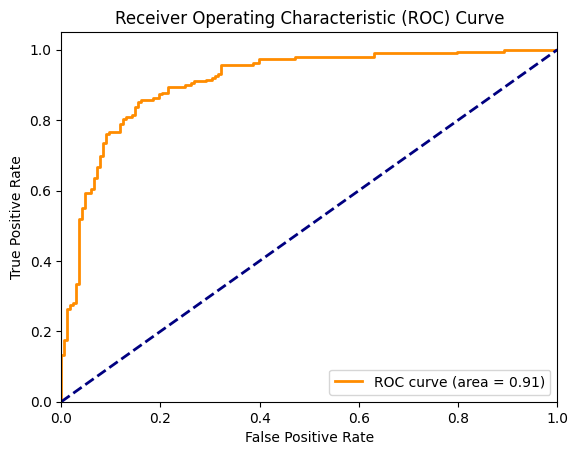

In [14]:
#ploting ROC curve as well
#predicting probabilities for the test set
y_prob = kan_model.predict_proba(X_test)[:, 1]

#creating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#ploting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
